In [1]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 104.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
  

In [2]:
import urllib.request
import zipfile
import os

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/1xfxlgvGZ8NfjXyXufJqL_qbjUBdYPV0G/view?usp=sharing'

In [5]:
id = link.split('d/')[1].split('/view?')[0]
print (id)

1xfxlgvGZ8NfjXyXufJqL_qbjUBdYPV0G


In [6]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Dataset Bangkit.zip')

In [7]:
file_zip = 'Dataset Bangkit.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./Dataset/')
zip_ref.close()

print(os.listdir('./Dataset/'))

['Not Leaf', 'Rust Leaf', 'Powdery Mildew', 'Leaf Spot']


In [8]:
TRAINING_DIR = os.path.join('/content/Dataset')

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range=20,
                                       zoom_range=0.2,
                                       shear_range=0.2,
                                       fill_mode='nearest',
                                       validation_split=0.2)

In [11]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='categorical',
                                                        subset='training')

Found 4806 images belonging to 4 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1201 images belonging to 4 classes.


In [13]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.5),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
        ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.000001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 63s 286ms/step - accuracy: 0.2643 - loss: 1.3951 - val_accuracy: 0.4638 - val_loss: 1.3559
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 246ms/step - accuracy: 0.3948 - loss: 1.3318 - val_accuracy: 0.4704 - val_loss: 1.3265
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 42s 269ms/step - accuracy: 0.4817 - loss: 1.2723 - val_accuracy: 0.5512 - val_loss: 1.2914
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 244ms/step - accuracy: 0.5220 - loss: 1.2111 - val_accuracy: 0.5470 - val_loss: 1.2550
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 243ms/step - accuracy: 0.5762 - loss: 1.1454 - val_accuracy: 0.5396 - val_loss: 1.2200
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 40s 256ms/step - accuracy: 0.6032 - loss: 1.0806 - val_accuracy: 0.5545 - val_loss: 1.1818
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 245ms/step - accuracy: 0.6141 - loss: 1.0293 - val_accuracy: 0.5337 - val_loss: 1.1477
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 246ms/step - accuracy: 0.6463 - loss: 0.957

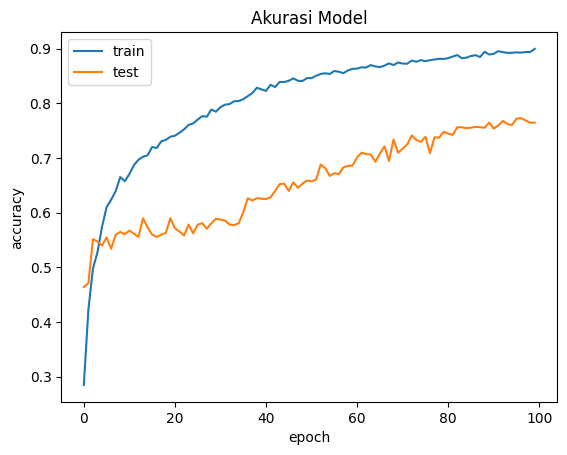

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

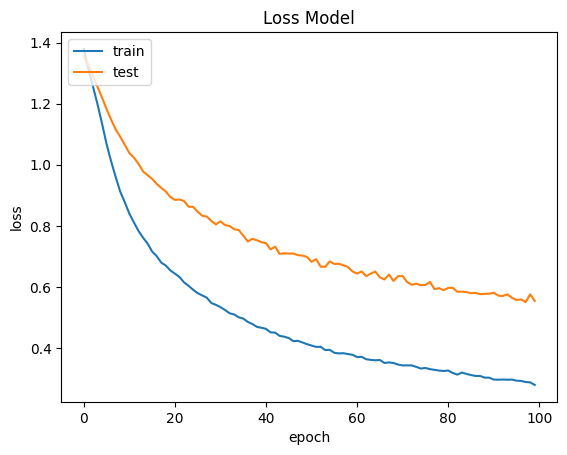

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
print(train_generator.class_indices)

{'Leaf Spot': 0, 'Not Leaf': 1, 'Powdery Mildew': 2, 'Rust Leaf': 3}


Saving dr_1_688.jpg to dr_1_688.jpg


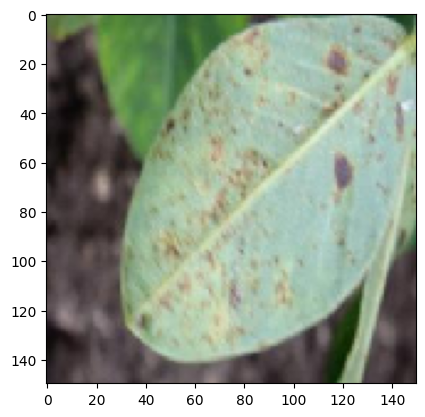

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
dr_1_688.jpg
Rust Leaf


In [33]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Upload images
uploaded = files.upload()

# Class labels based on the provided indices
class_labels = {0: 'Leaf Spot', 1: 'Not Leaf', 2: 'Powdery Mildew', 3: 'Rust Leaf'}

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Display the image
    imgplot = plt.imshow(img)
    plt.show()

    # Preprocess the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Predict the class
    classes = model.predict(images, batch_size=10)
    print(fn)

    # Get the index of the highest probability class
    predicted_class_index = np.argmax(classes[0])

    # Get the corresponding class label
    predicted_class_label = class_labels.get(predicted_class_index, "Unknown")

    # Print the predicted class
    print(predicted_class_label)


In [26]:
saved_model_path = "./my_model.h5"

model.save(saved_model_path)

In [27]:
!tensorflowjs_converter --input_format=keras /content/my_model.h5 /content/tfjs_model_2

2024-06-13 05:54:07.906936: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [28]:
!zip -r my_tfjs_model.zip /content/tfjs_model_2

  adding: content/tfjs_model_2/ (stored 0%)
  adding: content/tfjs_model_2/group1-shard6of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard14of19.bin (deflated 8%)
  adding: content/tfjs_model_2/model.json (deflated 83%)
  adding: content/tfjs_model_2/group1-shard7of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard16of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard11of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard10of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard13of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard9of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard8of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard4of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard2of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard18of19.bin (deflated 8%)
  adding: content/tfjs_model_2/group1-shard5of19.bin (deflated 8%)
  adding: content/tfjs